# Ejercicio de carga de datos, análisis inicial y preprocesamiento
El objetivo de este ejercicio es practicar las habilidades iniciales del trabajo
con datos empleando las liberías de NumPy, Pandas, Matplotlib y Sklearn.
Como guía pueden usar la documentación de las diferentes librerías:

*   NumPy: https://numpy.org/doc/stable/user/absolute_beginners.html
*   Pandas: https://pandas.pydata.org/docs/user_guide/10min.html
*   Sklearn: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing


# Librerías

In [237]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Carga de datos
Leer el archivo csv y cargarlos en un DataFrame de Pandas.

In [238]:
datos = pd.read_csv('./datasetalumnos(1).csv')

datos

,Edad,Trabajo_Padre,Trabajo_Madre,Guardian,Tiempo_viaje,Tiempo_estudio,Tiempo_Libre,Salidas,Salud,Faltas,G1,G2,G3
0,18,at_home,teacher,mother,2,2,3,4,3,6,5,6,6
1,17,at_home,other,father,1,2,3,3,3,4,5,5,6
2,15,at_home,other,mother,1,2,3,2,3,10,7,8,10
3,15,health,services,mother,1,3,2,2,5,2,15,14,15
4,16,other,other,father,1,2,3,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,services,services,other,1,2,5,4,4,11,9,9,9
391,17,services,services,mother,2,1,4,5,2,3,14,16,16
392,21,other,other,other,1,1,5,3,3,3,10,8,7
393,18,services,other,mother,3,1,4,1,5,0,11,12,10


## Análisis inicial de data
Para la data cargada, obtener la siguiente información:
* De las columnas numéricas, obtener información estadística
* Determinar cuántos ítems tienen campos vacíos (faltan datos)
* Determinar los valores únicos para los campos que no son numéricos

In [239]:
# Información estadística de las columnas numéricas
datos.describe()

,Edad,Tiempo_viaje,Tiempo_estudio,Tiempo_Libre,Salidas,Salud,Faltas,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,1.448101,2.035443,3.235443,3.108861,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,0.697505,0.839240,0.998862,1.113278,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,1.000000,1.000000,3.000000,2.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,1.000000,2.000000,3.000000,3.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,2.000000,2.000000,4.000000,4.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [240]:
# Ítems con campos vacíos
datos.isna().sum()

Edad              0
Trabajo_Padre     0
Trabajo_Madre     0
Guardian          0
Tiempo_viaje      0
Tiempo_estudio    0
Tiempo_Libre      0
Salidas           0
Salud             0
Faltas            0
G1                0
G2                0
G3                0
dtype: int64

In [241]:
# Valores únicos para campos con datos categóricos

# print("Trabajo_Madre:", datos.Trabajo_Madre.unique())
# print("Trabajo_Padre:", datos.Trabajo_Padre.unique())
# print("Guardian:", datos.Guardian.unique())

# datos_cat = []
# for dato in datos:
#     if (type(datos[dato][1]) == str):
#         datos_cat.append(dato)
#         print("{}: {}".format(dato, datos[dato].unique()))

datos_cat = np.array([])
for dato in datos:
    if (type(datos[dato][1]) == str):
        datos_cat = np.append(datos_cat, dato)
        print("{}: {}".format(dato, datos[dato].unique()))

datos_cat

Trabajo_Padre: ['at_home' 'health' 'other' 'services' 'teacher']
Trabajo_Madre: ['teacher' 'other' 'services' 'health' 'at_home']
Guardian: ['mother' 'father' 'other']


array(['Trabajo_Padre', 'Trabajo_Madre', 'Guardian'], dtype='<U32')

## Preprocesamiento básico
Reemplazar los campos no numéricos (texto) por números. Emplear la estrategia One-Hot encoding o Categorical encoding según corresponda.

https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features
https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html

In [242]:
# One-hot encoding para los datos categóricos

# dummies_madre = pd.get_dummies(datos.Trabajo_Madre)
# dummies_padre = pd.get_dummies(datos.Trabajo_Padre)
# dummies_guardian = pd.get_dummies(datos.Guardian)

dummies = []
for dato_cat in datos_cat:
    dummies.append(pd.get_dummies(datos[dato_cat]))

In [243]:
# Concatenar las tablas de dummies con los datos originales

# datos_preproc = pd.concat(
#     [datos, dummies_guardian, dummies_madre, dummies_padre], axis=1)

datos_preproc = pd.concat([datos] + [_ for _ in dummies], axis=1)

datos_preproc

,Edad,Trabajo_Padre,Trabajo_Madre,Guardian,Tiempo_viaje,Tiempo_estudio,Tiempo_Libre,Salidas,Salud,Faltas,...,services,teacher,at_home,health,other,services,teacher,father,mother,other
0,18,at_home,teacher,mother,2,2,3,4,3,6,...,0,0,0,0,0,0,1,0,1,0
1,17,at_home,other,father,1,2,3,3,3,4,...,0,0,0,0,1,0,0,1,0,0
2,15,at_home,other,mother,1,2,3,2,3,10,...,0,0,0,0,1,0,0,0,1,0
3,15,health,services,mother,1,3,2,2,5,2,...,0,0,0,0,0,1,0,0,1,0
4,16,other,other,father,1,2,3,2,5,4,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,services,services,other,1,2,5,4,4,11,...,1,0,0,0,0,1,0,0,0,1
391,17,services,services,mother,2,1,4,5,2,3,...,1,0,0,0,0,1,0,0,1,0
392,21,other,other,other,1,1,5,3,3,3,...,0,0,0,0,1,0,0,0,0,1
393,18,services,other,mother,3,1,4,1,5,0,...,1,0,0,0,1,0,0,0,1,0


## Graficar
Como desafío adicional, realizar dos gráficos de la data. Uno de dispersión de dos atributos, y un boxplot.
Pueden emplear la libería de Pandas o Matplotlib

https://pandas.pydata.org/docs/reference/plotting.html
https://matplotlib.org/stable/plot_types/index.html

### Gráfico de dispersión
Gráfico de dispersión respecto a tiempo libre y faltas de acuerdo a la edad

<AxesSubplot:xlabel='Tiempo_estudio', ylabel='Faltas'>

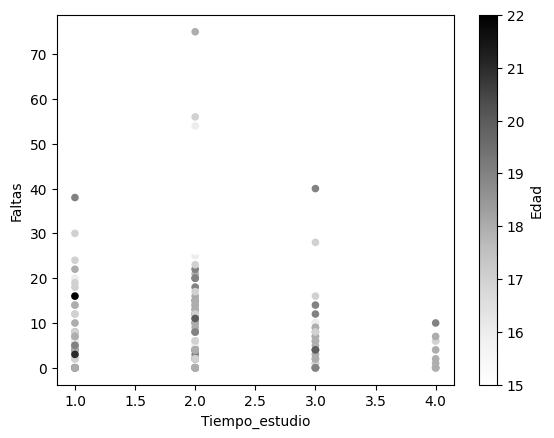

In [244]:
# Con matplotlib
datos.plot.scatter(x="Tiempo_estudio", y="Faltas", c="Edad")

array([[<AxesSubplot:xlabel='Tiempo_estudio', ylabel='Tiempo_estudio'>,
        <AxesSubplot:xlabel='Faltas', ylabel='Tiempo_estudio'>],
       [<AxesSubplot:xlabel='Tiempo_estudio', ylabel='Faltas'>,
        <AxesSubplot:xlabel='Faltas', ylabel='Faltas'>]], dtype=object)

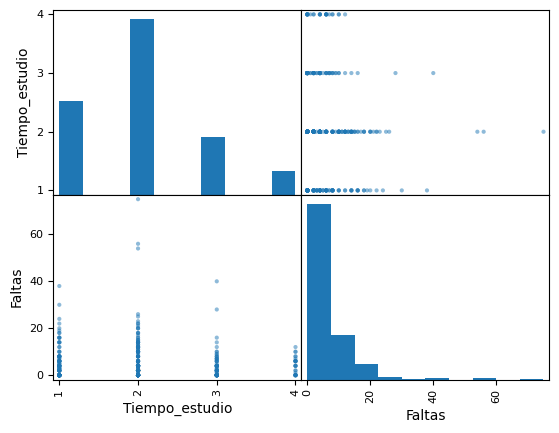

In [245]:
# Con Pandas
dataFrame = pd.DataFrame(data=datos, columns=["Tiempo_estudio", "Faltas"])
pd.plotting.scatter_matrix(dataFrame)

### Boxplot
Boxplot de faltas por edad

Faltas    AxesSubplot(0.125,0.11;0.775x0.77)
dtype: object

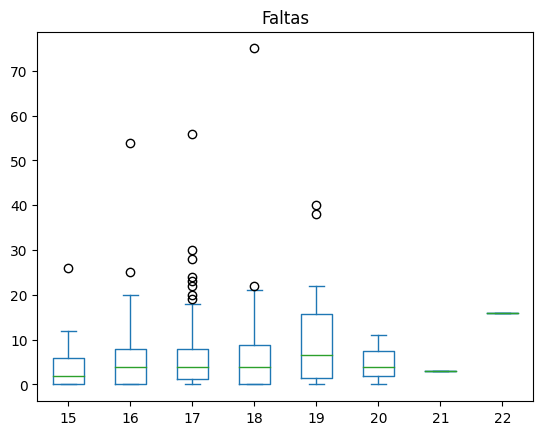

In [246]:
# Con matplotlib
datos.plot.box(column="Faltas", by="Edad")

<AxesSubplot:title={'center':'Faltas'}, xlabel='Edad'>

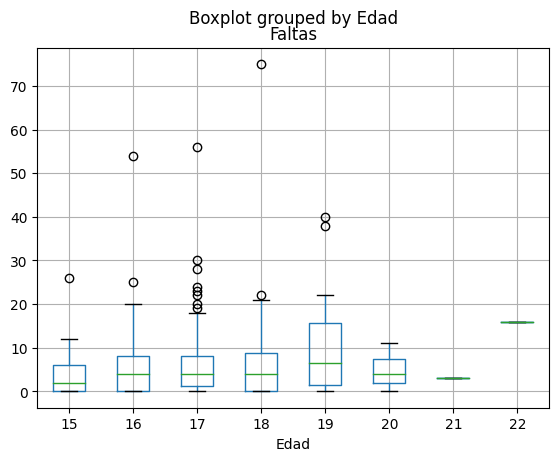

In [247]:
# Con Pandas
pd.plotting.boxplot(datos, column="Faltas", by="Edad")